In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
#import dataset
data = pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop(['Id'],axis=1)    #Dropping the Id column

In [4]:
#Label Encoding the targt class
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
print(data.Species)
data['Species']=le.transform(data['Species'])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [5]:
#Splitting the dataset inti dependent and independent(target class) features
x = data.drop('Species',axis=1)
y = data['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 120
Rows in test set: 30


In [7]:
#Building Desicion tree model
classifier_dt = DecisionTreeClassifier()

In [8]:
#Setting the range of parameters for GridSearch(hyper-parameter tunning)
max_features=[1,2,3,4]
max_depth=range(5,9,2)
max_leaf_nodes=range(2,8,1)
min_samples_split=range(2,10,2)

hyp_grid = {
    'max_features' : max_features,
    'max_depth' : max_depth,
    'max_leaf_nodes' : max_leaf_nodes,
    'min_samples_split' : min_samples_split
}

In [9]:
random_cv = GridSearchCV(classifier_dt,
                param_grid = hyp_grid,
                refit=True,
                verbose=5)

In [10]:
#Finding out the bsest combination of the above mentioned parameters
random_cv.fit(x_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2, score=0.708, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2, score=0.542, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2, score=0.625, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_split=2, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=2, min_samples_spl

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=2, score=0.917, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4, score=0.792, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4, score=0.708, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=4, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=2 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=2, score=0.917, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4 
[CV]  max_depth=5, max_features=1, max_leaf_nodes=7, min_samples_split=4, score=1.000, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=2, max_leaf_nodes=3, min_samples_split=8, score=0.875, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=4, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=4, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=4, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6, score=0.917, total=   0.0s
[CV] max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6 
[CV]  max_depth=5, max_features=2, max_leaf_nodes=6, min_samples_split=6, score=0.833, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=3, max_leaf_nodes=2, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2, score=0.917, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=3, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=2, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=2 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4, score=0.792, total=   0.0s
[CV] max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4 
[CV]  max_depth=5, max_features=3, max_leaf_nodes=6, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=6, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=6, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=6, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8, score=0.708, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=2, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=4 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6, score=0.958, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6, score=1.000, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6, score=0.833, total=   0.0s
[CV] max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=5, max_features=4, max_leaf_nodes=5, min_samples_split=6, score=1.000, total=   0.0s
[CV] max_depth=5, max_feature

[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4, score=0.708, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4, score=0.542, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=2, min_samples_split=6, score=0.542, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8, score=0.792, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8, score=0.833, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8, score=0.958, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=5, min_samples_split=8, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=6, min_samples_split=2 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=6, min_samples_split=2, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=1, max_leaf_nodes=6, min_samples_split=2 
[CV]  max_depth=7, max_features=1, max_leaf_nodes=6, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6, score=0.542, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=6, score=0.583, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=8, score=0.708, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=2, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8, score=1.000, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8, score=0.792, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8 
[CV]  max_depth=7, max_features=2, max_leaf_nodes=7, min_samples_split=8, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=2, min_samples_split=2 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=2, min_samples_split=2, score=0.708, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=4 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=4, score=0.958, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6, score=0.958, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6, score=1.000, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6, score=0.833, total=   0.0s
[CV] max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6 
[CV]  max_depth=7, max_features=3, max_leaf_nodes=5, min_samples_split=6, score=1.000, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=2, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4, score=0.708, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=2, min_samples_split=4, score=0.667, total=   0.0s
[CV] max_depth=7, max_feature

[CV]  max_depth=7, max_features=4, max_leaf_nodes=4, min_samples_split=8, score=0.833, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=4, min_samples_split=8 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=4, min_samples_split=8, score=1.000, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=4, min_samples_split=8 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=4, min_samples_split=8, score=0.917, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2, score=0.958, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2, score=1.000, total=   0.0s
[CV] max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2 
[CV]  max_depth=7, max_features=4, max_leaf_nodes=5, min_samples_split=2, score=0.833, total=   0.0s
[CV] max_depth=7, max_feature

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    3.9s finished


{'max_depth': 5,
 'max_features': 2,
 'max_leaf_nodes': 7,
 'min_samples_split': 4}

In [11]:
#Making the Decsison Tree Model
classifier_dt = DecisionTreeClassifier(max_depth=7,max_features=4,max_leaf_nodes=7,min_samples_split=8)
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features=4, max_leaf_nodes=7,
                       min_samples_split=8)

In [12]:
#Checking the model performance on Training Data
y_pred_train  = classifier_dt.predict(x_train)

# Testing the accuracy of model prediction
print('The accuracy of train case is {}'.format(accuracy_score(y_train,y_pred_train)))

data2 = pd.DataFrame({"Actual":y_train,"Predicted":y_pred_train})
data2.head()

The accuracy of train case is 0.975


,Actual,Predicted
22,0,0
15,0,0
65,1,1
11,0,0
42,0,0


In [13]:
#Checking the model performance on Testing Data
y_pred_test  = classifier_dt.predict(x_test)

# Testing the accuracy of model prediction
print('The accuracy of test case is {}'.format(accuracy_score(y_test,y_pred_test)))

data2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_test})
data2.head()

The accuracy of test case is 1.0


,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [17]:
np.unique(data['Species'])

array([0, 1, 2])

In [19]:
#Defing the feature names and class names that I want to show in The Tree chart
feature_names  = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
class_names  = ["Setosa", "Versicolor", "Virginica"]

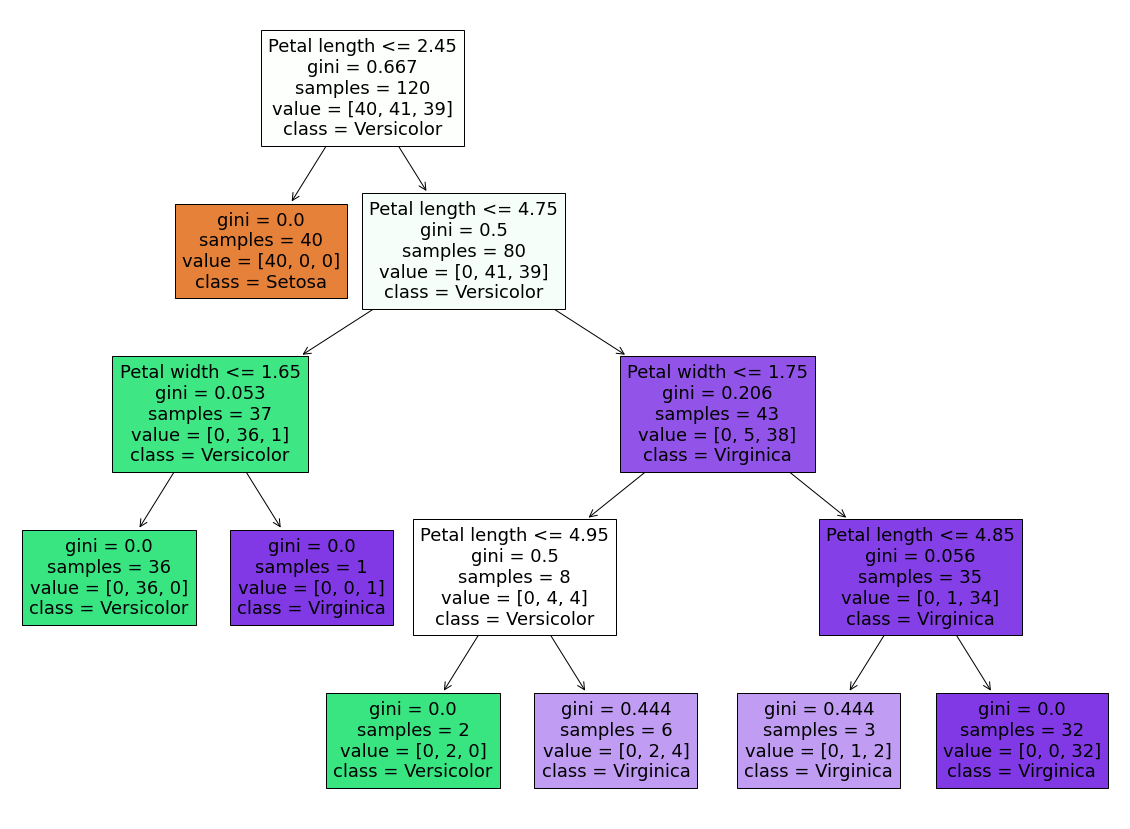

In [21]:
#Plotting the Decision Tree
plt.figure(figsize = (20,15))
tree = tree.plot_tree(classifier_dt, feature_names = feature_names, class_names = class_names, filled = True)